In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D,GlobalAveragePooling2D,Dropout,Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical


In [22]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [23]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Image: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Image: (10000, 32, 32, 3)


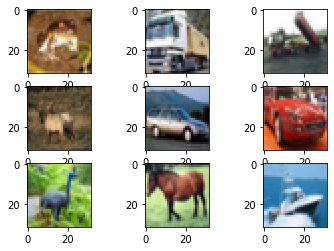

In [24]:
for i in range(9):
  plt.subplot(3,3,i+1)
  img=X_train[i]
  plt.imshow(img)
  
plt.show()


In [25]:
seed=5
np.random.seed(seed)
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
X_train=X_train/255
X_test=X_test/255

In [26]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [27]:
num_classes=y_test.shape[1]
print(y_train.shape)
print(y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [28]:
def allcnn(weights=None):
    
    model = Sequential()

    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    
    if weights:
        model.load_weights(weights)
    
    
    return model


We are importing pre_trained weights from github due to timing constraint and since we are training it on a CPU, it will take upto 500 hours to train.

In [29]:
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9
weights='all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)


sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print (model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 192)      

In [30]:
score=model.evaluate(X_test,y_test,verbose=1)
print('Accuracy:',score[1])

10000/10000 [==============================] - 72s 7ms/step
Accuracy: 0.9088000059127808


In [31]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']


In [32]:
class_labels=dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [33]:
batch=X_test[50:59]
labels=np.argmax(y_test[50:59],axis=-1)
print(labels)
predictions=model.predict(batch,verbose=1)

[9 8 0 3 8 8 7 7 4]
9/9 [==============================] - 0s 12ms/step


In [34]:
print(predictions)

[[1.75278784e-21 1.20995177e-26 1.02598962e-30 3.45891470e-31
  1.12584838e-32 6.79043046e-33 8.17169376e-25 1.85982691e-30
  1.02192135e-19 1.00000000e+00]
 [4.34375886e-12 3.53270573e-11 1.80247809e-12 1.58276359e-09
  5.44766315e-11 1.96048435e-14 2.60614001e-08 5.55186686e-15
  1.00000000e+00 2.44664055e-12]
 [2.95581073e-01 8.45129193e-07 1.07729636e-01 5.29369533e-01
  3.51869017e-02 6.00524759e-03 5.39665198e-05 2.40119454e-02
  1.59592196e-06 2.05935771e-03]
 [5.55831016e-14 1.75983794e-11 1.48217022e-10 9.99999762e-01
  6.13521109e-08 8.34682297e-08 7.97154676e-10 1.50536961e-11
  2.11071090e-14 2.17565506e-12]
 [6.32131639e-11 3.55323193e-13 1.40073343e-19 5.42620607e-19
  5.86434994e-20 4.42417672e-21 3.30459281e-21 2.61615180e-22
  1.00000000e+00 2.97757810e-15]
 [7.15458626e-09 1.11680806e-13 9.57944119e-14 2.60100728e-14
  3.74665780e-14 2.73676701e-14 1.52867775e-17 6.24359545e-19
  1.00000000e+00 7.60676075e-15]
 [1.76974980e-11 2.76935762e-14 2.82259177e-12 1.19055635e

In [35]:
for image in predictions:
  print(np.sum(image))

1.0
1.0
1.0000001
0.9999999
1.0
1.0
1.0
0.99999994
1.0000001


In [36]:
class_results=np.argmax(predictions,axis=-1)
print(class_results)

[9 8 3 3 8 8 7 3 5]


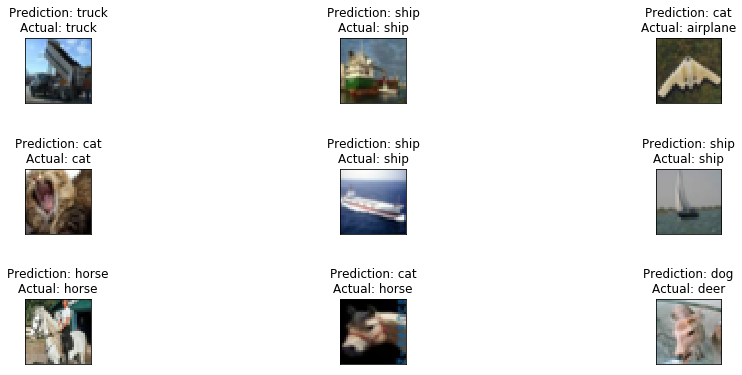

In [37]:
fig, axs = plt.subplots(3, 3, figsize = (16, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    
    for key, value in class_labels.items():
        if class_results[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    
    axs[i].imshow(img)
    

plt.show()


Note:-Some of the predictions are compromised due to not so good tuning of hyperparameters.But still accuracy of 90% is better.